In [8]:
#files
import sys
#from os import listdir
sys.path.append('../data')
sys.path.append('../Librerias')
#from os.path import isfile, join

#own libs
import utils
import caract as dc
import dataset as ds
from models import SimpleRNN, LSTM
#from lstm_models import LSTM
import utils_2 as ut2
from traindata import trainData
from test_class import testSVR
import errores as er



#data and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import pickle

sns.set_style("darkgrid")


import numpy as np
from tqdm import tqdm



np.random.seed(seed=77)

In [2]:
fpath = "/Users/consu/OneDrive/Documentos/GitHub/Tesis/data/low/"
#fpath = "/Users/granosftp/Documents/GitHub/Tesis/data/low/"
fname = "file1_080124.mat"
#cutoff = [8/1000, 11/1000]

data = trainData(fpath, fname, 'Gradient Phase')
train, val, test = data.split_data('Gradient Phase')


0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Length: 600000, dtype: float64
0         0.001705
1         0.001436
2         0.001494
3         0.001446
4         0.001489
            ...   
599995    0.000679
599996    0.000686
599997    0.000843
599998    0.000868
599999    0.001361
Name: Amplitude, Len

In [3]:
amplitude = data.data['Gradient Phase']
defectos = data.defectos_set()

In [4]:
filename = 'SVRFase_model.sav'
model = pickle.load(open(filename, 'rb'))


c:\Users\consu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator SVR from version 1.0.2 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


## **50 steps**

In [23]:
steps = 50
x_test, y_test = ut2.defectos_set(defectos, amplitude, 50)


In [24]:
test50 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test50_MLP_defectos.csv", test50, delimiter=",")

100%|██████████| 96/96 [00:01<00:00, 60.06it/s]


In [25]:
mse, mape, r2, rmse = er.calculate_errors(test50, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.018835767602738914
Mean Absolute Percentage Error: 513.5048554658896
R2 Score: -1631567.4240950393
Root Mean Squared Error: 0.12571982719548414


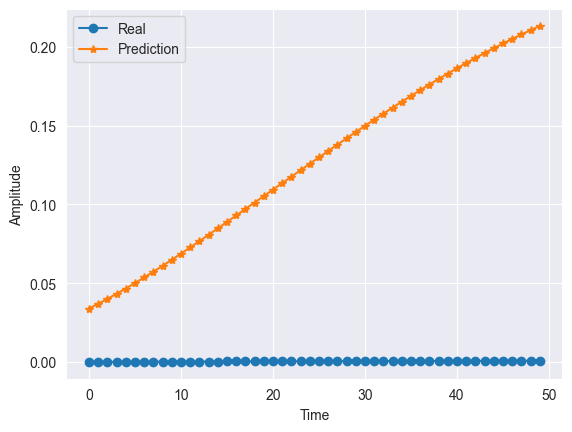

In [26]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test50[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## **100 steps**

In [30]:
steps = 100
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [31]:
test100 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test100_MLP_defectos.csv", test100, delimiter=",")

100%|██████████| 96/96 [00:02<00:00, 32.14it/s]


In [32]:
mse, mape, r2, rmse = er.calculate_errors(test100, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.042905488124446715
Mean Absolute Percentage Error: 454.27937360274086
R2 Score: -1005066.9969575421
Root Mean Squared Error: 0.1917944307686503


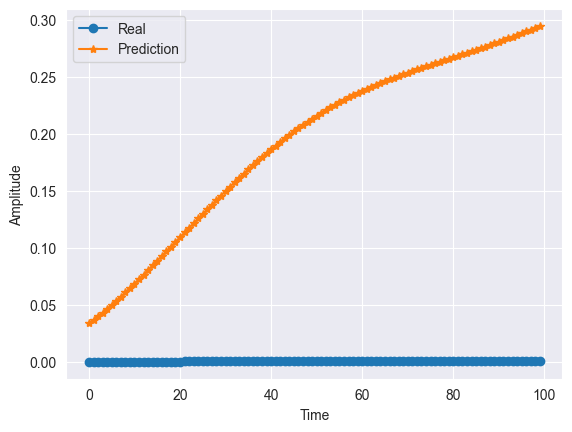

In [33]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test100[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **500 steps**

In [34]:
steps = 500
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [35]:
test500 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test500_MLP_defectos.csv", test500, delimiter=",")

100%|██████████| 96/96 [00:14<00:00,  6.53it/s]


In [36]:
mse, mape, r2, rmse = er.calculate_errors(test500, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.1258218200463158
Mean Absolute Percentage Error: 705.8670431026842
R2 Score: -525580.6452104533
Root Mean Squared Error: 0.33899937219318643


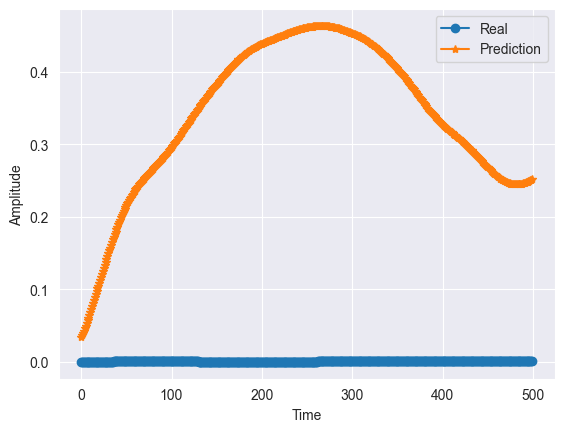

In [37]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test500[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## **1000 steps**

In [38]:
steps = 1000
x_test, y_test = ut2.defectos_set(defectos, amplitude, steps)

In [39]:
test1000 = ut2.rollingWindowPrediction_SVR(model,x_test,steps)
np.savetxt("test1000_MLP_defectos.csv", test1000, delimiter=",")

100%|██████████| 96/96 [00:28<00:00,  3.34it/s]


In [40]:
mse, mape, r2, rmse = er.calculate_errors(test1000, y_test)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mape}')
print(f'R2 Score: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.09686968805646039
Mean Absolute Percentage Error: 589.1636127724196
R2 Score: -358191.7013857845
Root Mean Squared Error: 0.2960741885345212


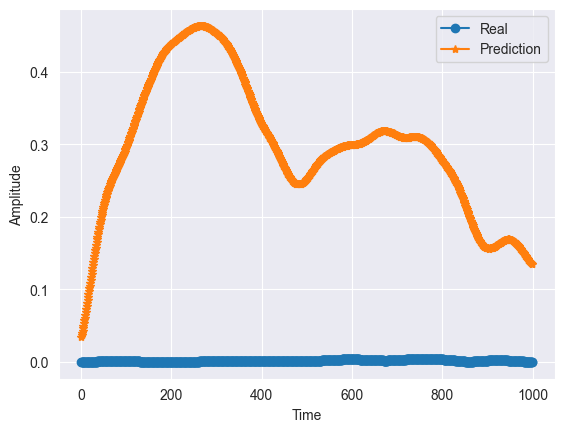

In [41]:
i = -1
plt.plot(y_test[i], 'o-',label='Real')
plt.plot(test1000[i], '*-',label='Prediction')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()